In [128]:
# Import the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

In [130]:
df = pd.read_csv('News.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44919 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44919 non-null  object
 1   text     44919 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44919 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [131]:
df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


#### In this exercise, we are only focusing on the content of the new, so we can drop the title, subject and date columns

In [133]:
df = df.drop(['title', 'subject', 'date'], axis = 1)

In [134]:
df.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


#### Let's see if there are missing values in the dataset

In [136]:
df.isnull().sum()

text     0
class    0
dtype: int64

#### When training these type of models, it is important to avoid patterns in the order of the dataset (e.g., all fake news samples are grouped together, followed by real news samples, which is our case). If the data is no shuffled, the model might learn spurious correlations based on the order rather than the actual features, leading to bias in the predictions.

#### Shuffling the datasets ensures that the data points are randomly distributed, making the model learn general patterns instead of being influenced by their order. So let's shuffle the dataset to avoid this bias:

In [138]:
df = df.sample(frac = 1)   # We shuffle the dataset sampling 100% (frac = 1) of the rows in random order
df.reset_index(inplace = True)   # Reseting the indexes 
df = df.drop('index', axis = 1)

In [139]:
df.head()

,text,class
0,YANGON (Reuters) - The Vatican on Wednesday de...,1
1,,0
2,Obama didn t appear to be very pleased when CN...,0
3,It s always fun when Hollywood shows a conserv...,0
4,Taxpayers need to start calling out the colleg...,0


#### Let' see if we have a balance dataset

In [141]:
news = df['class'].value_counts() # Naming the different diseases and counting how many times they appear in the column

news_data = pd.DataFrame({'Fake News': news.index,
                         'Counts': news.values}) # Store the information of the diseases into a DataFrame for a clearer view
print(news_data) 

   Fake News  Counts
0          0   23502
1          1   21417


Text(0.5, 0, 'Fake News')

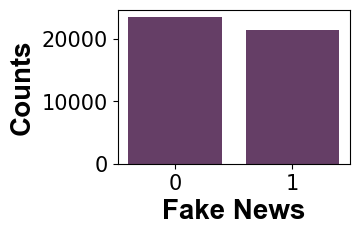

In [142]:
# Plotting the values in a bar plot for clearer understanding
plt.figure(figsize=(3, 2))
plt.bar(news_data['Fake News'], news_data['Counts'], color = '#653e66')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Counts', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Fake News', fontsize = 20, fontweight='bold', **csfont)

#### We can see that our dataset is balanced

#### Now it is time to prepare the data for the model, since we have full sentences. We will remove all the stopwords, punctuations and any irrelevant spaces from the text. For that, we will use NLTK Library. Let's import the main modules:

In [144]:
!pip install nltk

In [145]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Let's create a function designed to clean and preprocess text data. It will remove unnecesary characters (like punctuation), convert text to lowercase, and remove common English stopwords (like 'and', 'the', 'is', etc.), which do not contribute much to the meaning of the text.

In [167]:
def preprocess_text(text_data):
    preprocessed_text = []                                                       # Initialise an empty list for the sentences after cleaning
    
    for sentence in tqdm(text_data):                                             # Loop through each sentence in the input data (tqdm shows a progress bar)
        sentence = re.sub(r'[^\w\s]', '', sentence)                              # Replace all characters that are not word characters (\w) or spaces (\s) with an empty string
        preprocessed_text.append(' '.join(token.lower()                          # Puts the space-separated sencente into a list. token.lower converts each word to lowercase
                                  for token in str(sentence).split()             # split() splits the sentence into individual words
                                  if token not in stopwords.words('english')))   #stopwords.words filters outh words that are in the list of stopwords from NLTK

    return preprocessed_text

In [169]:
preprocessed_review = preprocess_text(df['text'].values)
df['text'] = preprocessed_review

100%|██████████████████████████████████████████████████████████████████████████| 44919/44919 [1:51:51<00:00,  6.69it/s]


## Exploratory Data Analysis

#### Now we can visualize the most repeated words in a wordcloud. Let's make one for the fake news and other for the real news

In [180]:
!pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/299.9 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/299.9 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/299.9 kB 281.8 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/299.9 kB 281.8 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/299.9 kB 467.6 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/299.9 kB 700.2 kB/s eta 0:00:01
   -------------------------------------  297.0/299.9 kB 965.4 kB/s eta 0:00:01
   -------------------------------------- 299.9/299.9 kB 928.5 kB/s eta 0:00:00


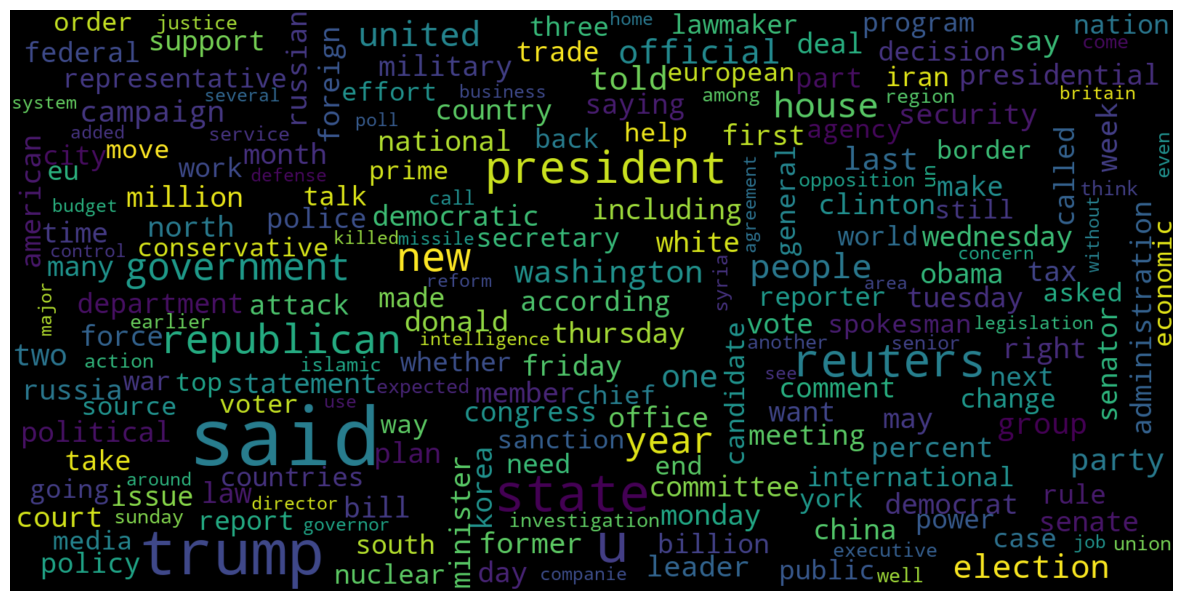

In [186]:
from wordcloud import WordCloud

# Wordcloud for the real news
consolidated = ' '.join(
    word for word in df['text'][df['class'] == 1].astype(str))
wordCloud = WordCloud(width = 1600, height = 800, random_state = 21, max_font_size = 110, collocations = False)

plt.figure(figsize = (15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation = 'bilinear')
plt.axis('off')
plt.show()

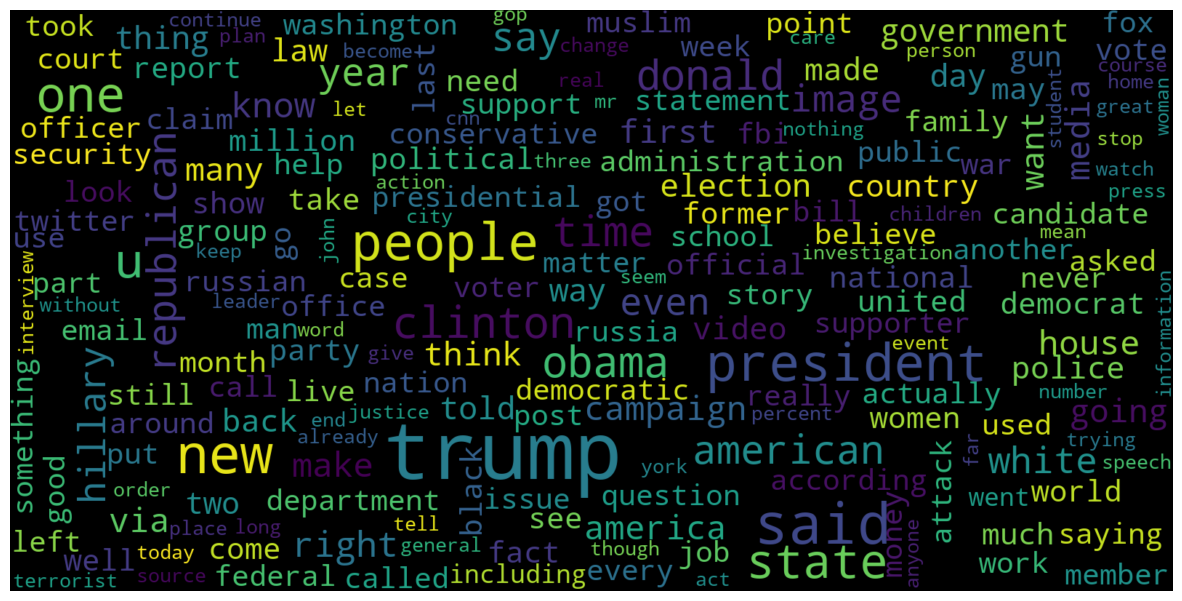

In [188]:
# Wordcloud for the fake news
consolidated = ' '.join(
    word for word in df['text'][df['class'] == 0].astype(str))
wordCloud = WordCloud(width = 1600, height = 800, random_state = 21, max_font_size = 110, collocations = False)

plt.figure(figsize = (15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation = 'bilinear')
plt.axis('off')
plt.show()

#### Even though wordclouds are a good start to see the most repeated words, we are going to make a bargraph of the top 20 most repeated words in the dataset:

In [192]:
from collections import Counter

word_list = [word for sentence in preprocessed_review for word in sentence.split()]     # Flatten the list of sentences into a single list of words
word_counts = Counter(word_list)   # Count word frequencies
most_common_words = word_counts.most_common(20)   # Get the most common words
words, counts = zip(*most_common_words)    # Separate words and their frequencies

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'said'),
  Text(1, 0, 'trump'),
  Text(2, 0, 'the'),
  Text(3, 0, 'us'),
  Text(4, 0, 'i'),
  Text(5, 0, 'would'),
  Text(6, 0, 'president'),
  Text(7, 0, 'people'),
  Text(8, 0, 'one'),
  Text(9, 0, 'state'),
  Text(10, 0, 'also'),
  Text(11, 0, 'new'),
  Text(12, 0, 'reuters'),
  Text(13, 0, 'donald'),
  Text(14, 0, 'states'),
  Text(15, 0, 'house'),
  Text(16, 0, 'government'),
  Text(17, 0, 'clinton'),
  Text(18, 0, 'it'),
  Text(19, 0, 'obama')])

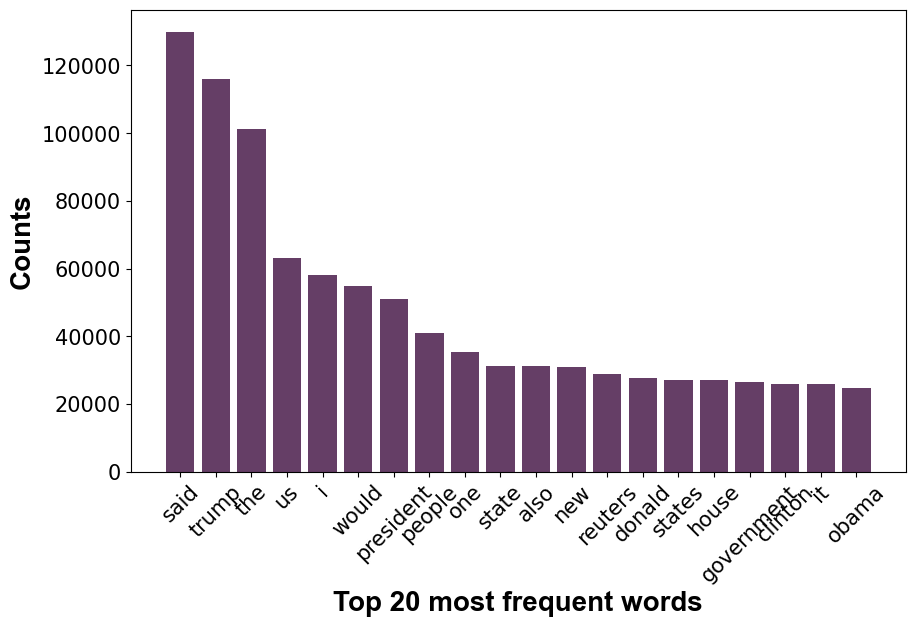

In [194]:
plt.figure(figsize = (10, 6))
plt.bar(words, counts, color = '#653e66')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Counts', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Words', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Top 20 most frequent words', fontsize = 20, fontweight='bold', **csfont)
plt.xticks(rotation = 45)

## Train/test split and converting text into vectors

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size = 0.2, random_state = 19)

In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
X_train = vectorization.fit_transform(X_train)
X_test = vectorization.transform(X_test)

## Model training

In [203]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

Accuracy Score (Logistic Regression model): 98.89804096170971 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

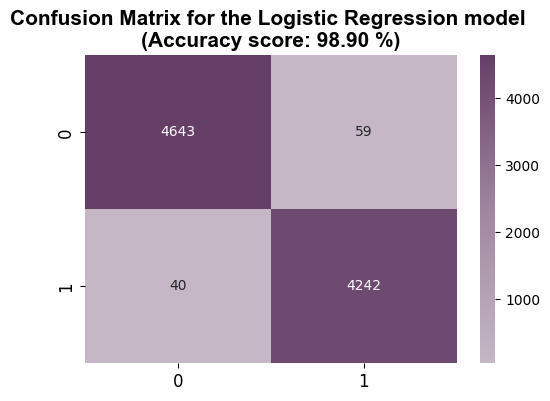

In [208]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy Score (Logistic Regression model):", accuracy_score(y_test, y_pred)*100, "%") # Print the accuracy score for the predictions

cm = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Logistic Regression model \n(Accuracy score: {accuracy_score(y_test, y_pred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Single prediction

#### Let's try to predict if a news is real or fake:

In [356]:
news_text_test = """ 

In an unprecedented event, extraterrestrial beings have reportedly landed in Silicon Valley to attend the annual Global Artificial Intelligence Summit. Witnesses claim that a spacecraft appeared in the skies above Palo Alto late last night, emitting a beam of light that caused temporary internet outages in the area.

Local authorities have confirmed strange activity but are yet to release an official statement. A mysterious group of humanoid figures, allegedly speaking in a digital-like language, were seen entering the conference venue early this morning. Several attendees claim the beings demonstrated advanced knowledge of machine learning and even presented a groundbreaking algorithm capable of solving global warming.

While skeptics dismiss the event as an elaborate hoax, social media is abuzz with photos and videos purportedly capturing the moment. Experts warn that this could either be humanity's greatest technological collaboration—or a clever attempt to generate headlines for the AI summit.

Stay tuned as the story develops.

"""
test_df = pd.DataFrame([[news_text_test]], columns = ['text'])

In [358]:
preprocessed_test = preprocess_text(test_df['text'].values)
test_df['text'] = preprocessed_test

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.44it/s]


In [360]:
X_news_test = vectorization.transform(test_df['text'])

In [362]:
news_prediction = classifier.predict(X_news_test)

In [364]:
if news_prediction == 0:
    print('This is a fake news.')
else:
    print('This is a real news')

This is a fake news.
